<a href="https://colab.research.google.com/github/AthleticBabushka/ml/blob/main/miniproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install flask-ngrok

In [3]:
!pip install pyngrok==4.1.1
!ngrok authtoken '2G4WJMQ0pqS2jrTj2uFBqvQ9601_yEBALH7ewM2Q6d8Kqtrt'

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [7]:
! unzip fe.zip

Archive:  fe.zip
   creating: static/css/
  inflating: static/css/materialize.css  
  inflating: static/css/materialize.min.css  
  inflating: static/css/style.css    
   creating: static/js/
  inflating: static/js/init.js       
  inflating: static/js/materialize.js  
  inflating: static/js/materialize.min.js  
  inflating: templates/index.html    


In [9]:
from flask_ngrok import run_with_ngrok
from flask import Flask, render_template
## running the flask app
app = Flask(__name__)
## we need to move to ngrok when app is run
run_with_ngrok(app)
@app.route("/")

def index():
  return render_template('index.html')
@app.route("/get_details")

def get_details():
  return "<h1>This is get detail page</h1>"
@app.route("/test")

def test():
  return "<h1>This is get detail test</h1>"    

app.run()  

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://c6df-34-67-64-109.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [14/Oct/2022 06:53:03] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [14/Oct/2022 06:53:03] "GET /static/css/style.css HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [14/Oct/2022 06:53:03] "GET /static/css/materialize.css HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [14/Oct/2022 06:53:03] "GET /static/js/materialize.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [14/Oct/2022 06:53:04] "GET /static/js/init.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [14/Oct/2022 06:53:05] "GET /favicon.ico HTTP/1.1" 404 -


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('Churn_Modelling.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Organization

In [ ]:
data_copy = data.copy()

In [ ]:
data_copy.drop(columns=['CustomerId', 'RowNumber', 'Surname'], inplace = True)

In [ ]:
data_copy = pd.get_dummies(data_copy, columns = ["Geography", 'Gender'])

In [ ]:
data_copy.drop(columns=['Gender_Female'], inplace = True)

In [ ]:
data_copy

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,1
9996,9997,15569892,Johnstone,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,1
9997,9998,15584532,Liu,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,0
9998,9999,15682355,Sabbatini,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,1


# Alternate approach to One hot encodinng

In [ ]:
from sklearn.preprocessing import OneHotEncoder 

In [ ]:
ohe = OneHotEncoder(drop = 'if_binary')

In [ ]:
x= ohe.fit_transform(data_copy[['Gender', 'Geography']]).toarray()

# X,y Split

In [ ]:
y = data_copy.pop('Exited')
X = data_copy

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y) 

# Oversampling

In [ ]:
df_test= pd.concat([X_train, y_train],axis = 1)

In [ ]:
count_0, count_1 = df_test.Exited.value_counts()

df0 = df_test[df_test.Exited == 0]
df1 = df_test[df_test.Exited == 1]

In [ ]:
df1_over = df1.sample(count_0, replace = True)
df_test_over = pd.concat([df1_over, df0], axis = 0)


In [ ]:
#shuffle
df_test_over = df_test_over.sample(frac = 1)

In [ ]:
y_train = df_test_over.pop('Exited')
X_train = df_test_over

#2. Smote to create samples, Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(sampling_strategy='minority', k_neighbors= 5)
X_tr_os, y_tr_os = smote.fit_resample(X_train, y_train)

# Model training

In [ ]:
from xgboost import XGBClassifier

In [ ]:
#after tuning params are inserted

In [ ]:
model = XGBClassifier(objective = 'binary:logistic', scale_pos_weight = 5,
reg_lambda = 0,
max_depth = 5,
learning_rate = 0.05,
gamma = 0.25,
subsample= 0.9,
colsample_bytree= 0.6,
)

In [ ]:
model.fit(X_train, y_train, early_stopping_rounds= 10, eval_metric= 'auc', eval_set= [(X_test, y_test)])

[0]	validation_0-auc:0.7528
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.763492
[2]	validation_0-auc:0.750467
[3]	validation_0-auc:0.802531
[4]	validation_0-auc:0.81203
[5]	validation_0-auc:0.828353
[6]	validation_0-auc:0.82449
[7]	validation_0-auc:0.835474
[8]	validation_0-auc:0.838412
[9]	validation_0-auc:0.841702
[10]	validation_0-auc:0.843916
[11]	validation_0-auc:0.844658
[12]	validation_0-auc:0.845505
[13]	validation_0-auc:0.84653
[14]	validation_0-auc:0.847677
[15]	validation_0-auc:0.847627
[16]	validation_0-auc:0.847826
[17]	validation_0-auc:0.847167
[18]	validation_0-auc:0.847376
[19]	validation_0-auc:0.846983
[20]	validation_0-auc:0.847964
[21]	validation_0-auc:0.84807
[22]	validation_0-auc:0.848094
[23]	validation_0-auc:0.848993
[24]	validation_0-auc:0.849175
[25]	validation_0-auc:0.848372
[26]	validation_0-auc:0.849137
[27]	validation_0-auc:0.85016
[28]	validation_0-auc:0.850585
[29]	validation_0-auc:0.8506
[30]	validation_0-auc:0.8

XGBClassifier(colsample_bytree=0.6, gamma=0.25, learning_rate=0.05, max_depth=5,
              reg_lambda=0, scale_pos_weight=5, subsample=0.9)

# Model Tuning 

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
param_dict = {
    'max_depth' : [2, 3, 4, 5],
    'learning_rate' : [0.1, 0.01, 0.05],
    'gamma'         : [0, 0.25, 1],
    'reg_lambda'    : [0, 1 ,10],
    'scale_pos_weight': [3, 4, 5]

}

In [ ]:
# {'scale_pos_weight': 5,
#  'reg_lambda': 0,
#  'max_depth': 5,
#  'learning_rate': 0.05,
#  'gamma': 0.25}
#   best score = 0.8677312224128434


In [ ]:
#round 2
param_dict = {
    'max_depth' : [5, 6, 7 ],
    'learning_rate' : [0.05],
    'gamma'         : [0.25],
    'reg_lambda'    : [0],
    'scale_pos_weight': [5, 6, 7]

}

In [ ]:
# {'scale_pos_weight': 5,
#  'reg_lambda': 0,
#  'max_depth': 5,
#  'learning_rate': 0.05,
#  'gamma': 0.25}
#best params

In [ ]:
rand = RandomizedSearchCV(XGBClassifier(objective = 'binary:logistic', subsample= 0.9, colsample_bytree= 0.6), param_dict, scoring = 'roc_auc', n_jobs = -1, refit = True, cv = 5, verbose = 2)
rand.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Fitting 5 folds for each of 9 candidates, totalling 45 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(colsample_bytree=0.6, subsample=0.9),
                   n_jobs=-1,
                   param_distributions={'gamma': [0.25],
                                        'learning_rate': [0.05],
                                        'max_depth': [5, 6, 7],
                                        'reg_lambda': [0],
                                        'scale_pos_weight': [5, 6, 7]},
                   scoring='roc_auc', verbose=2)

In [ ]:
rand.best_params_

{'scale_pos_weight': 5,
 'reg_lambda': 0,
 'max_depth': 5,
 'learning_rate': 0.05,
 'gamma': 0.25}

In [ ]:
rand.best_score_

0.8678068552665084

In [ ]:
model = rand

#Classification Metrics

In [ ]:
from sklearn.metrics import accuracy_score , f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, precision_recall_curve, classification_report

Tuning: roc curve

In [ ]:
y_prob_pred = model.predict_proba(X_test)
y_prob_pred[:, 1:]

array([[0.21761498],
       [0.2736241 ],
       [0.30092812],
       ...,
       [0.6448235 ],
       [0.07255711],
       [0.44318053]], dtype=float32)

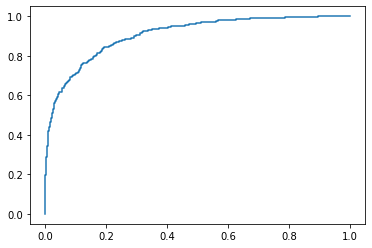

In [ ]:
fpr , tpr , threshold = roc_curve(y_test, y_prob_pred[:, 1:])
plt.plot(fpr, tpr)

precision-recall curve

Text(0, 0.5, 'precision')

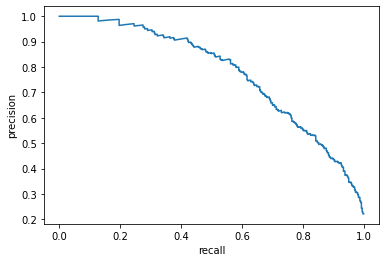

In [ ]:
precision, recall, threshold = precision_recall_curve(y_test, y_prob_pred[:, 1:])
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')

In [ ]:
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [ ]:
print("                   Train data")
print(classification_report(y_train, y_pred_train))

                   Train data
              precision    recall  f1-score   support

           0       0.94      0.83      0.88      6370
           1       0.54      0.79      0.64      1630

    accuracy                           0.82      8000
   macro avg       0.74      0.81      0.76      8000
weighted avg       0.86      0.82      0.83      8000



In [ ]:
print("                   Test data")
print(classification_report(y_test, y_pred_test))

                   Test data
              precision    recall  f1-score   support

           0       0.94      0.83      0.88      1593
           1       0.54      0.78      0.64       407

    accuracy                           0.82      2000
   macro avg       0.74      0.81      0.76      2000
weighted avg       0.86      0.82      0.83      2000



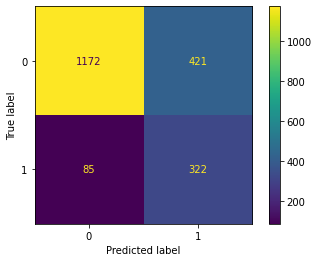

In [ ]:
dsp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_test))
dsp.plot()

# Better accuracy metrics

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold , cross_val_score, learning_curve

In [ ]:
cv = RepeatedStratifiedKFold(n_splits = 5)

In [ ]:
scores = cross_val_score(XGBClassifier(), X, y, scoring = 'balanced_accuracy', cv = cv, n_jobs = -1, verbose = 2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   22.7s finished


In [ ]:
scores.mean()

0.7136026111024171

# Model Diagnosis

i) Learning Curve

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(XGBClassifier(), X, y, train_sizes= np.linspace(0.01, 1, 50), scoring = 'balanced_accuracy', n_jobs = -1, verbose = 1 )

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[learning_curve] Training set sizes: [  80  241  403  564  726  888 1049 1211 1373 1534 1696 1857 2019 2181
 2342 2504 2666 2827 2989 3151 3312 3474 3635 3797 3959 4120 4282 4444
 4605 4767 4928 5090 5252 5413 5575 5737 5898 6060 6222 6383 6545 6706
 6868 7030 7191 7353 7515 7676 7838 8000]


[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   59.4s finished


In [ ]:
train_score_mean = np.mean(train_scores, axis = 1 )
train_score_std = np.std(train_scores, axis = 1 )
test_score_mean = np.mean(test_scores, axis = 1 )
test_score_std = np.std(test_scores, axis = 1 )

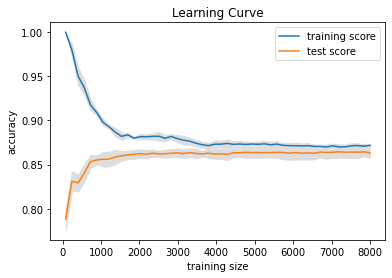

In [ ]:
plt.plot(train_sizes, train_score_mean, label = 'training score')
plt.plot(train_sizes, test_score_mean, label = 'test score')
plt.fill_between(train_sizes, train_score_mean- train_score_std, train_score_mean+train_score_std, color = '#DDDDDD')
plt.fill_between(train_sizes, test_score_mean- test_score_std, test_score_mean+test_score_std, color = '#DDDDDD')
plt.title('Learning Curve')
plt.xlabel('training size')
plt.ylabel('accuracy')
plt.legend(loc = 'best')

# Save model

In [ ]:
filename = str('model.joblib')

In [ ]:
import joblib

In [ ]:
joblib.dump(model, filename)

['model.joblib']

In [ ]:
from google.colab import files
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
clf = joblib.load(filename)

#Tree

In [ ]:
from xgboost import plot_tree

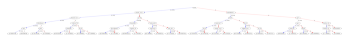

In [ ]:
plot_tree(clf)
plt.show()

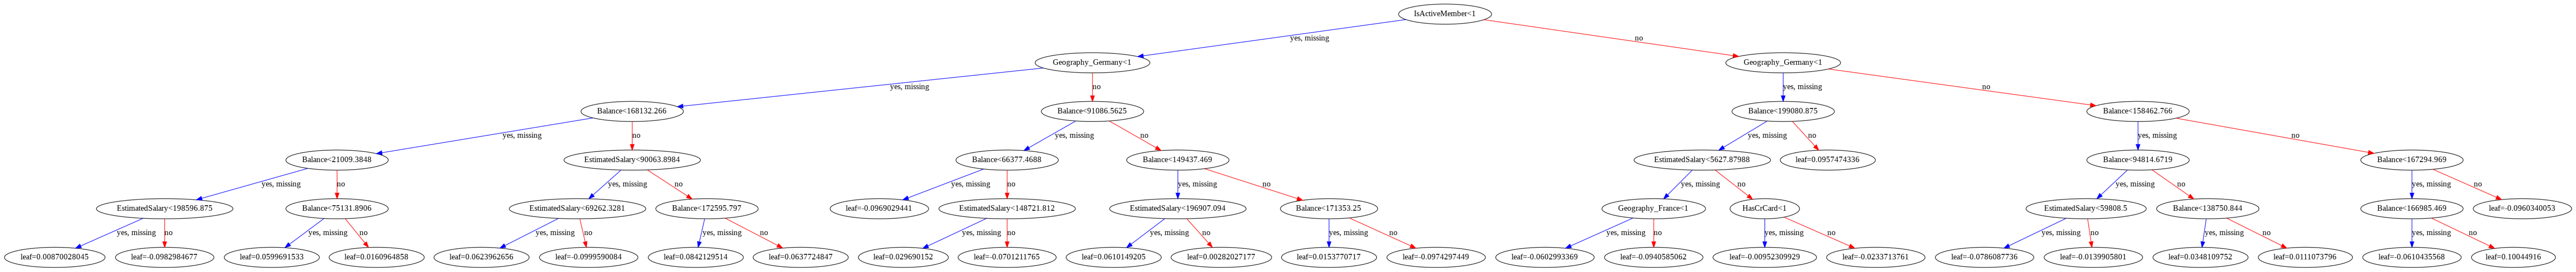

In [ ]:
plot_tree(clf, num_trees=2)
fig = plt.gcf()
fig.set_size_inches(150, 100)
